In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
npts=2**8
nper=12
t=nper*np.arange(npts)/npts
f=1
squid=-np.sin(2*np.pi*f*t)

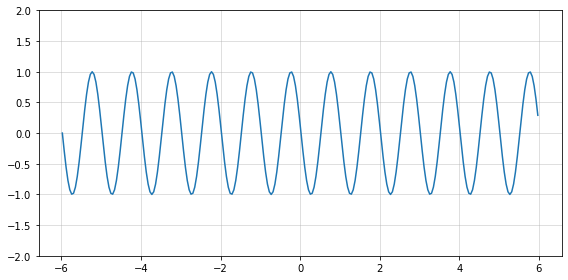

In [16]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t-t[-1]/2,squid)
ax.set_ylim(-2,2)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
fig.tight_layout()
plt.savefig('car_squid.pdf', bbox_inches='tight')


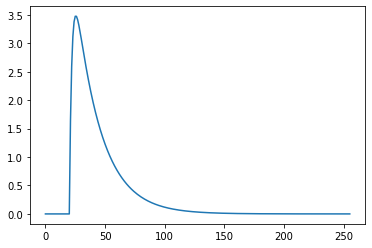

In [11]:
taurise=0.1
taufall=1
pulse=np.zeros(len(t))
i0=20
pulse[i0:]=-5*(np.exp(-t[:-i0]/taurise)-np.exp(-t[:-i0]/taufall))
plt.plot(pulse)

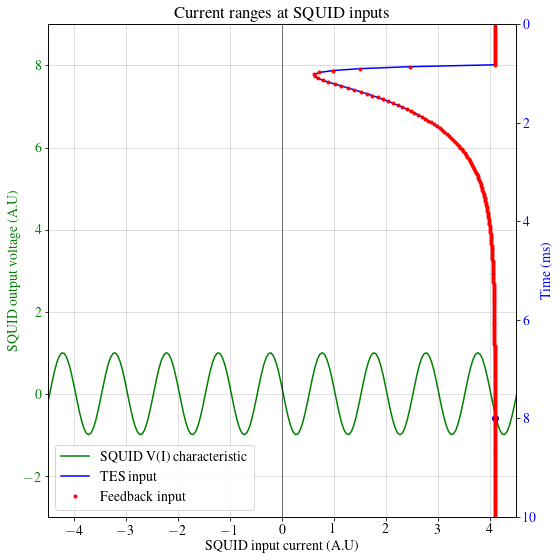

In [70]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 14 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t-t[-1]/2,squid,'g',label='SQUID V(I) characteristic')
offset=0.1
ax.plot(4+offset, -np.sin(2*np.pi*f*offset), 'ob')
ax.plot(4+offset-pulse,t[-1]-t-3,'-b',label='TES input')
#ax.plot(offset, -np.sin(2*np.pi*f*offset), 'or')
ax.plot(4+offset-pulse,t[-1]-t-3,'.r', label='Feedback input')
#ax.plot(offset-pulse%1,t[-1]-t-3,'.r', label='Feedback input')
ax.set_xlim(-4.5,4.5)
ax.set_ylim(-3,9)
ax.set_title('Current ranges at SQUID inputs')
ax.set_xlabel('SQUID input current (A.U)')
ax.set_ylabel('SQUID output voltage (A.U)', color='g')
ax.legend(loc='lower left')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.tick_params(axis='y', labelcolor='g')
ax.plot([0,0],[-3,9],'k',linewidth=0.5)

ax2 = ax.twinx()
ax2.set_ylabel('Time (ms)', color='b')
ax2.set_ylim(10,0)
ax2.tick_params(axis='y', labelcolor='b')
fig.tight_layout()
plt.savefig('ranges_1.pdf', bbox_inches='tight')


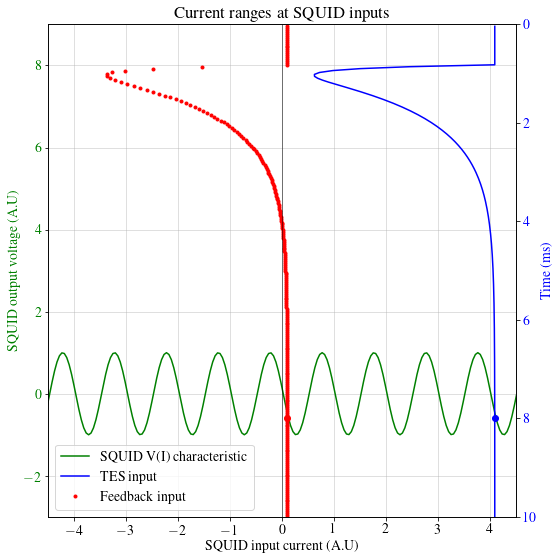

In [69]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 14 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t-t[-1]/2,squid,'g',label='SQUID V(I) characteristic')
offset=0.1
ax.plot(4+offset, -np.sin(2*np.pi*f*offset), 'ob')
ax.plot(4+offset-pulse,t[-1]-t-3,'-b',label='TES input')
ax.plot(offset, -np.sin(2*np.pi*f*offset), 'or')
ax.plot(offset-pulse,t[-1]-t-3,'.r', label='Feedback input')
#ax.plot(offset-pulse%1,t[-1]-t-3,'.r', label='Feedback input')
ax.set_xlim(-4.5,4.5)
ax.set_ylim(-3,9)
ax.set_title('Current ranges at SQUID inputs')
ax.set_xlabel('SQUID input current (A.U)')
ax.set_ylabel('SQUID output voltage (A.U)', color='g')
ax.legend(loc='lower left')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.tick_params(axis='y', labelcolor='g')
ax.plot([0,0],[-3,9],'k',linewidth=0.5)

ax2 = ax.twinx()
ax2.set_ylabel('Time (ms)', color='b')
ax2.set_ylim(10,0)
ax2.tick_params(axis='y', labelcolor='b')
fig.tight_layout()
plt.savefig('ranges_2.pdf', bbox_inches='tight')


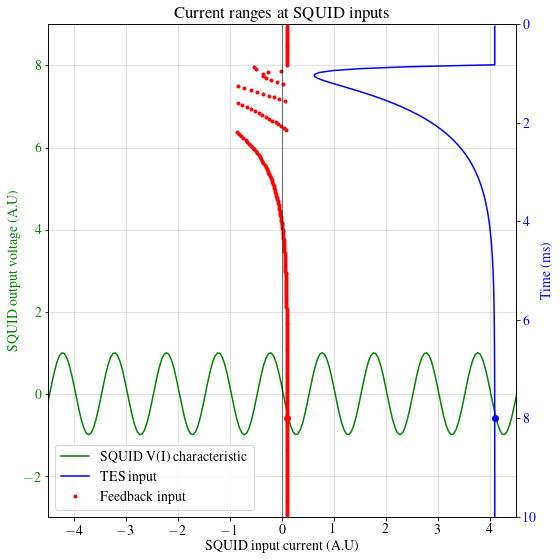

In [68]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 14 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t-t[-1]/2,squid,'g',label='SQUID V(I) characteristic')
offset=0.1
ax.plot(4+offset, -np.sin(2*np.pi*f*offset), 'ob')
ax.plot(4+offset-pulse,t[-1]-t-3,'-b',label='TES input')
ax.plot(offset, -np.sin(2*np.pi*f*offset), 'or')
#ax.plot(offset-pulse,t[-1]-t-3,'--r', label='Feedback input')
ax.plot(offset-pulse%1,t[-1]-t-3,'.r', label='Feedback input')
ax.set_xlim(-4.5,4.5)
ax.set_ylim(-3,9)
ax.set_title('Current ranges at SQUID inputs')
ax.set_xlabel('SQUID input current (A.U)')
ax.set_ylabel('SQUID output voltage (A.U)', color='g')
ax.legend(loc='lower left')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.tick_params(axis='y', labelcolor='g')
ax.plot([0,0],[-3,9],'k',linewidth=0.5)

ax2 = ax.twinx()
ax2.set_ylabel('Time (ms)', color='b')
ax2.set_ylim(10,0)
ax2.tick_params(axis='y', labelcolor='b')
fig.tight_layout()
plt.savefig('ranges_3.pdf', bbox_inches='tight')


In [2]:
def step_response(t, a, tau):
    """
    Creates a first order step response function.
    - t is the time (x axis) (np.array)
    - a is the asymptote (np.float)
    - tau is the time constant (np.float)
    """
    import numpy as np
    return a*(1-np.exp(-t/tau))

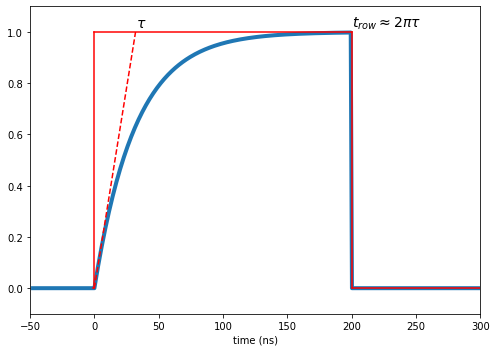

In [83]:
npts=2**20
t=np.arange(npts)/(1000*npts)
t-=(50/(1000*npts))
sig=np.zeros(npts)
sig[50:260]=step_response(t[50:260], 1, 32e-9)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t[0:1000]*1e9,sig[0:1000], linewidth=4)
ax.plot([0,32], [0,1], '--r')
ax.plot([-1,0], [0,0], 'r')
ax.plot([0,0], [0,1], 'r')
ax.plot([0,200], [1,1], 'r')
ax.plot([200,200], [1,0], 'r')
ax.plot([200,500], [0,0], 'r')
ax.set_xlim(-50,300)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel('time (ns)')
ax.text(32, 1.02, r'$\tau$', color='k', size=14)
ax.text(200, 1.02, r'$t_{row}\approx 2\pi\tau$', color='k', size=14)
fig.tight_layout()
plt.savefig('row.pdf', bbox_inches='tight')


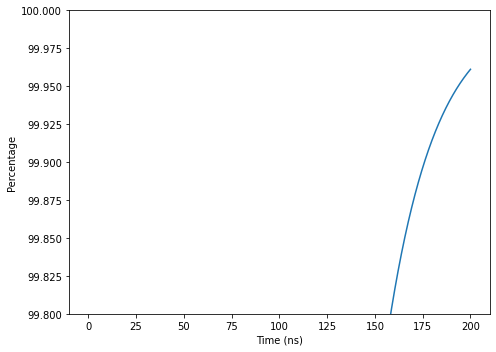

In [15]:
npts=1e6
fc=6.25e6
tau=1/(2*np.pi*fc)
t=np.arange(npts)/(5000000*npts)
response=step_response(t, 1, tau)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t*1e9, response*100)
ax.set_ylim(99.8, 100)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Percentage')
fig.tight_layout()



In [11]:
print(tau)


2.5464790894703256e-08
